In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df= pd.read_csv("food_adulteration_data.csv")

print("Shape:", df.shape)
print(df.head())
print(df.isna().sum())

Shape: (1000, 10)
   adulteration_id product_name   brand   category             adulterant  \
0                1       Butter  BrandB       Meat  Artificial sweeteners   
1                2      Chicken  BrandC      Dairy        Coloring agents   
2                3       Yogurt  BrandC       Meat  Artificial sweeteners   
3                4         Wine  BrandB  Beverages        Coloring agents   
4                5        Bread  BrandD      Dairy                  Water   

  detection_date          detection_method  severity health_risk  \
0      5/11/2024  Microbiological Analysis  Moderate         Low   
1      5/23/2024        Sensory Evaluation    Severe      Medium   
2      2/17/2024        Sensory Evaluation    Severe        High   
3      5/16/2024              Spectroscopy     Minor      Medium   
4       6/6/2024         Chemical Analysis    Severe      Medium   

             action_taken  
0          Product Recall  
1          Warning Issued  
2  Investigation Launched 

In [ ]:
df.columns= df.columns.str.lower().str.strip().str.replace(" ", "_")

df["detection_date"]= pd.to_datetime(df["detection_date"], errors="coerce")

# Handling missing value
df= df.dropna(subset=["adulteration_id", "product_name", "brand", "category", "adulterant", "severity", "detection_method", "severity","health_risk", "action_taken"])

# Remove duplicates 
df= df.drop_duplicates(subset=["adulteration_id"])

text_cols= ["brand", "category", "adulterant", "detection_method", "severity", "health_risk", "action_taken"]
for col in text_cols:
    df[col]= df[col].astype(str).str.strip().str.title()
    
df["year"]= df["detection_date"].dt.year
df["month"]= df["detection_date"].dt.month  


In [9]:
snapshot= {
    "total_cases": len(df),
    "unique_products": df["product_name"].nunique(),
    "unique_brands": df["brand"].nunique(),
    "categories": df["category"].nunique(),
    "adulterants": df["adulterant"].nunique(),
    "methods": df["detection_method"].nunique()  
}
snapshot

{'total_cases': 1000,
 'unique_products': 10,
 'unique_brands': 5,
 'categories': 5,
 'adulterants': 5,
 'methods': 4}

In [ ]:
#Categories and adulterants
top_categories = df["category"].value_counts().head(10)
top_adulterants = df["adulterant"].value_counts().head(10)

print("Top Categories:", top_categories)
print("Top Adulterants:", top_adulterants)

Top Categories: category
Meat          221
Dairy         218
Bakery        191
Beverages     186
Condiments    184
Name: count, dtype: int64
Top Adulterants: adulterant
Coloring Agents          215
Chalk                    202
Artificial Sweeteners    196
Melamine                 194
Water                    193
Name: count, dtype: int64


In [24]:
#Severity
severity_map = {'Minor':1, "Moderate":2, "Severe":3}
df["severity_score"]= df["severity"].map(severity_map)

avg_severity= np.mean(df["severity_score"])
std_severity= np.std(df["severity_score"])

print(avg_severity)
print(std_severity)  


1.966
0.821488892195141


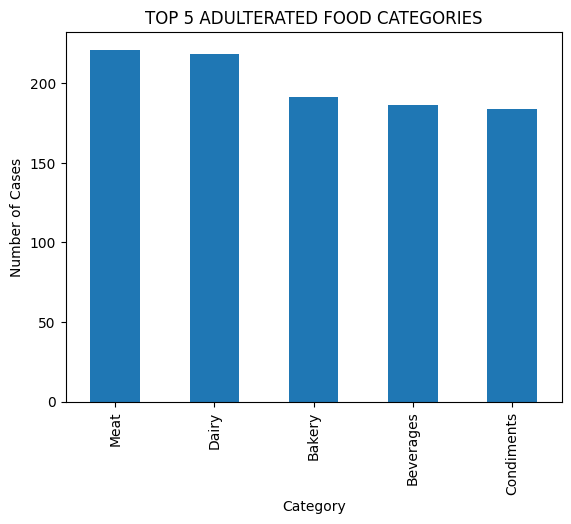

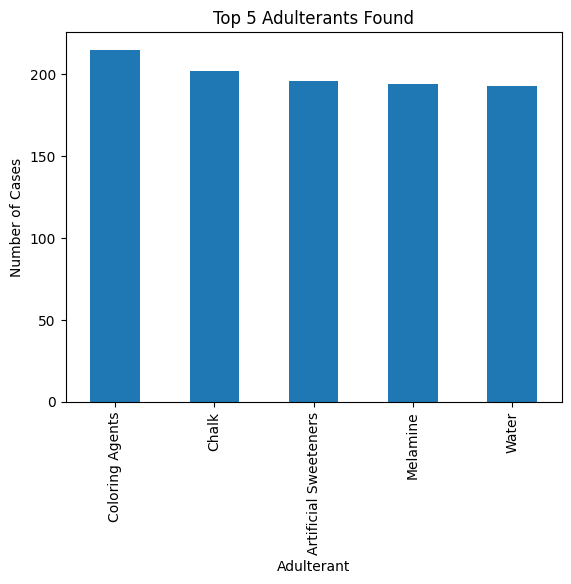

In [27]:
plt.figure()
top_categories.head(5).plot(kind="bar")
plt.title("TOP 5 ADULTERATED FOOD CATEGORIES")
plt.xlabel("Category")
plt.ylabel("Number of Cases")
plt.show()

plt.figure()
top_adulterants.head(5).plot(kind="bar")
plt.title("Top 5 Adulterants Found")
plt.xlabel("Adulterant")
plt.ylabel("Number of Cases")
plt.show()


In [ ]:
#Severity and health risk 
severity_list= df["severity"].value_counts()
health_risk_list= df["health_risk"].value_counts()

print(severity_list)
print(health_risk_list)

severity
Minor       355
Moderate    324
Severe      321
Name: count, dtype: int64
health_risk
Low       358
High      325
Medium    317
Name: count, dtype: int64


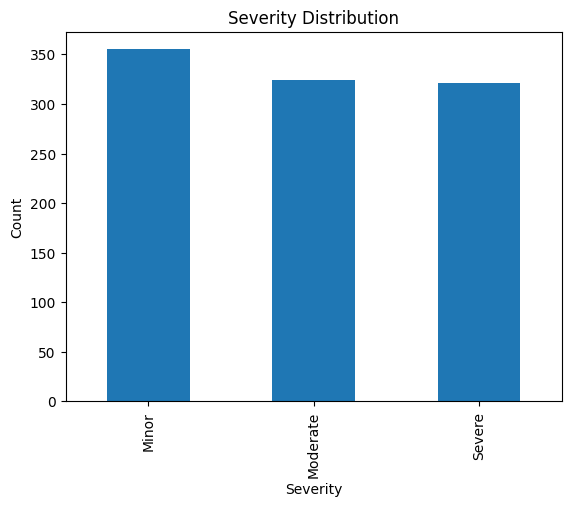

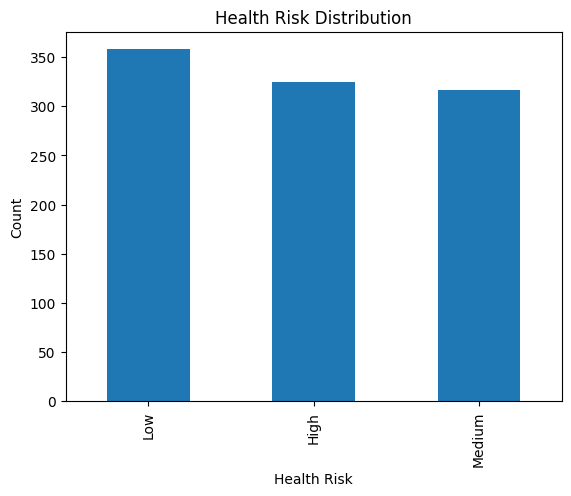

In [33]:
# Visualization 
plt.figure()
severity_list.plot(kind="bar")
plt.title("Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

plt.figure()
health_risk_list.plot(kind="bar")
plt.title("Health Risk Distribution")
plt.xlabel("Health Risk")
plt.ylabel("Count")
plt.show()


detection_method
Spectroscopy                254
Microbiological Analysis    250
Chemical Analysis           249
Sensory Evaluation          247
Name: count, dtype: int64


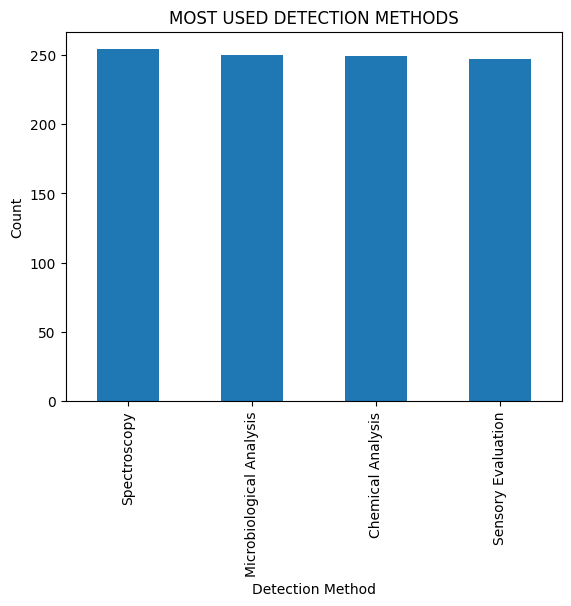

In [36]:
# Most used detection methods 
method_counts = df["detection_method"].value_counts()
print(method_counts.head(10))

plt.figure()
method_counts.head(6).plot(kind="bar")
plt.title("MOST USED DETECTION METHODS")
plt.xlabel("Detection Method")
plt.ylabel("Count")
plt.show()

brand
Brandc    222
Brandd    208
Brande    198
Branda    197
Brandb    175
Name: count, dtype: int64


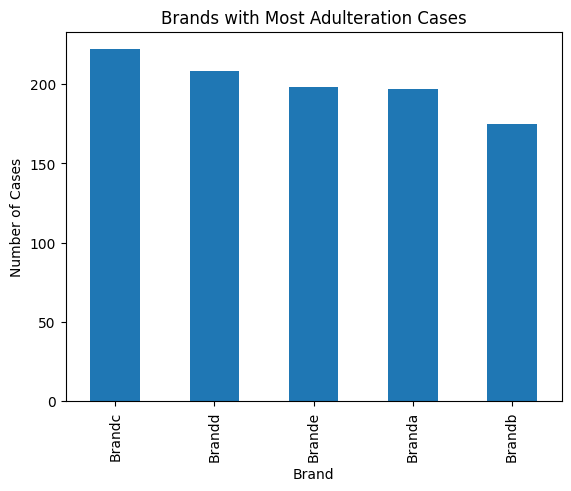

In [39]:
#Brand Analysis 
top_adulterated_brands= df["brand"].value_counts().head(10)
print(top_adulterated_brands)

plt.figure()
top_adulterated_brands.plot(kind="bar")
plt.title("Brands with Most Adulteration Cases")
plt.xlabel("Brand")
plt.ylabel("Number of Cases")
plt.show()

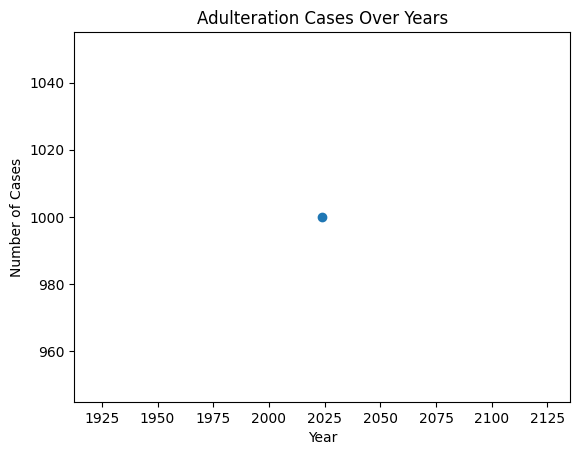

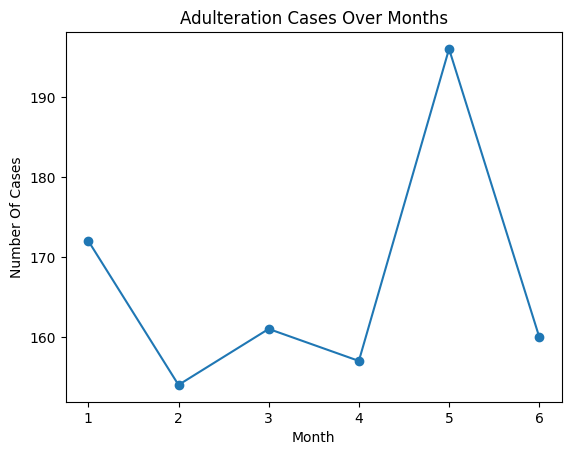

In [44]:
#Time Trends 
yearly_cases= df["year"].value_counts().sort_index()
monthly_cases= df["month"].value_counts().sort_index()

plt.figure()
plt.plot(yearly_cases.index, yearly_cases.values, marker="o")
plt.title("Adulteration Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()

plt.figure()
plt.plot(monthly_cases.index, monthly_cases.values, marker="o")
plt.title("Adulteration Cases Over Months")
plt.xlabel("Month")
plt.ylabel("Number Of Cases")
plt.show()

action_taken
Investigation Launched    265
Product Recall            255
Fine Imposed              246
Warning Issued            234
Name: count, dtype: int64


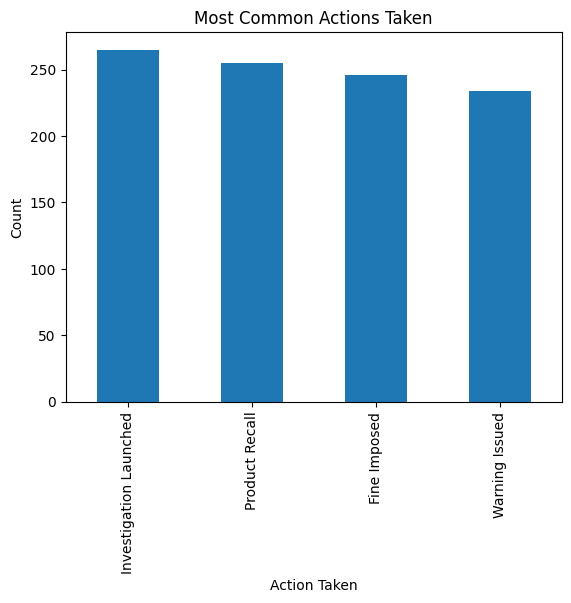

In [46]:
#Regulatory actions 
actions_list= df["action_taken"].value_counts()
print(actions_list)

plt.figure()
actions_list.head(6).plot(kind="bar")
plt.title("Most Common Actions Taken")
plt.xlabel("Action Taken")
plt.ylabel("Count")
plt.show()

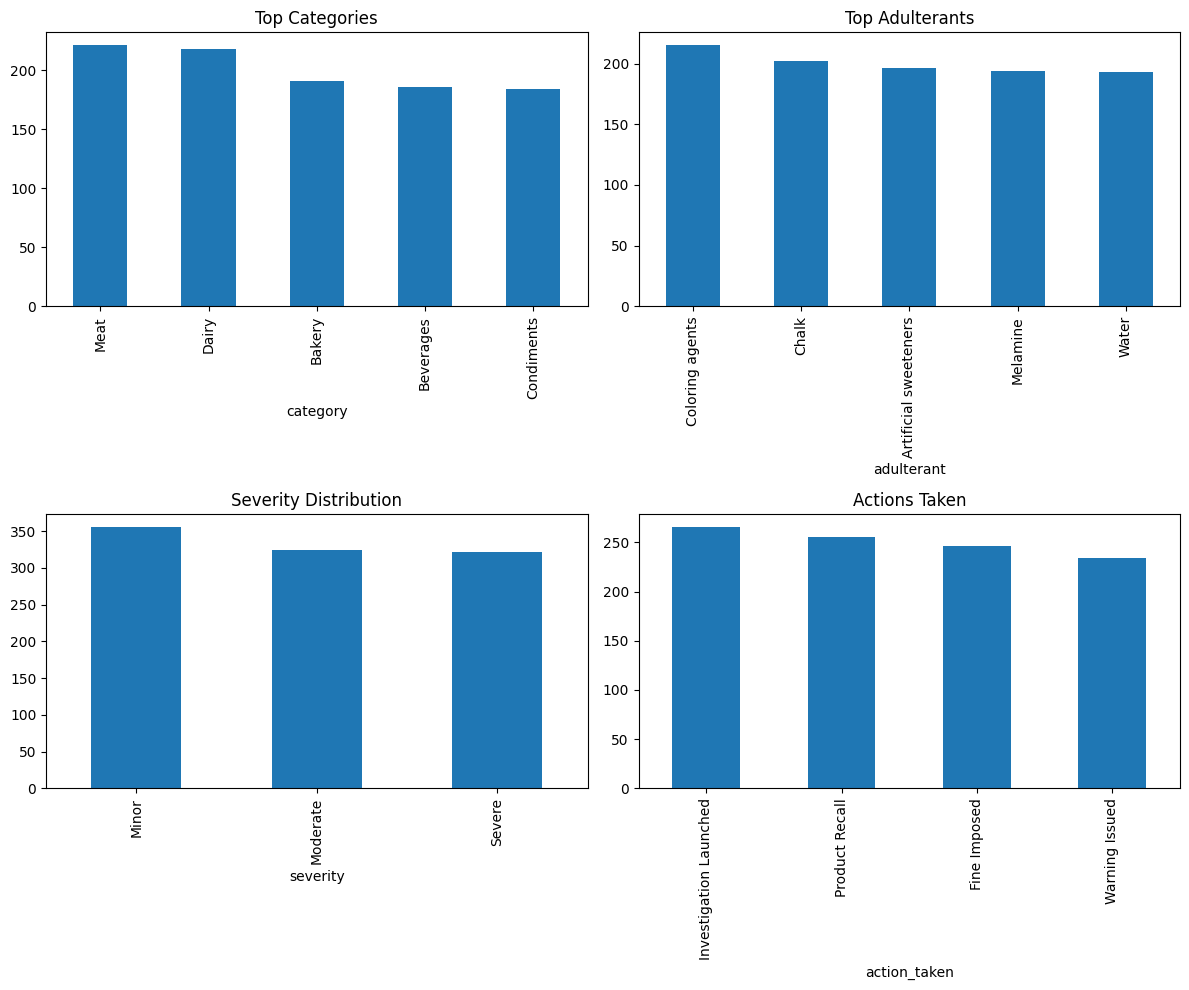

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df["category"].value_counts().head(5).plot(kind="bar", ax=axes[0,0], title="Top Categories")
df["adulterant"].value_counts().head(5).plot(kind="bar", ax=axes[0,1], title="Top Adulterants")
df["severity"].value_counts().plot(kind="bar", ax=axes[1,0], title="Severity Distribution")
df["action_taken"].value_counts().head(5).plot(kind="bar", ax=axes[1,1], title="Actions Taken")

plt.tight_layout()
plt.show()
